#### Import data set

#### Cleaning, lemmatizing, and removing stop words

In [1]:
import pickle
import datatable as dt
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

with open('cleaned reviews.pkl', 'rb') as f:
    reviews = pickle.load(f)
df = dt.fread('tripadvisor_hotel_reviews.csv').to_pandas()
df.columns = df.columns.str.lower()
df['review'] = reviews
# Add a column length of review
df['review_length'] = df['review'].map(len)

#### Get ngrams tokens

In [2]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter


def get_most_commons(text_array, n_gram=1):
    text = ''.join(text_array)
    tokens = nltk.word_tokenize(text)
    n_grams = ngrams(tokens, n_gram)
    counter = Counter(n_grams).most_common(20)
    return [(' '.join(i[0]), i[1]) for i in counter]

In [3]:
uni_most_commons = get_most_commons(reviews)
bi_most_commons = get_most_commons(reviews, 2)
tri_most_commons = get_most_commons(reviews, 3)

In [4]:
def to_df(c):
    return pd.DataFrame(data=c, columns=['token', 'frequency'])


df_uni = to_df(uni_most_commons)
df_bi = to_df(bi_most_commons)
df_tri = to_df(tri_most_commons)

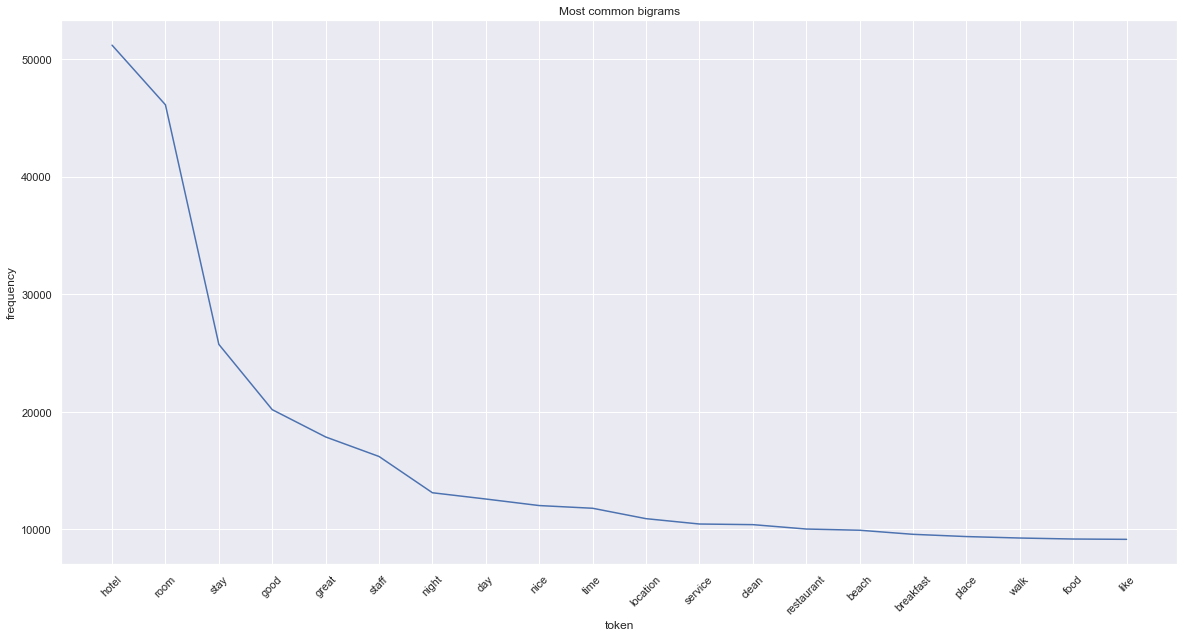

In [5]:
sb.set(rc={"figure.figsize": (20, 10)})
sb.lineplot(data=df_uni, x='token', y='frequency').set(title='Most common bigrams')
plt.xticks(rotation=45);

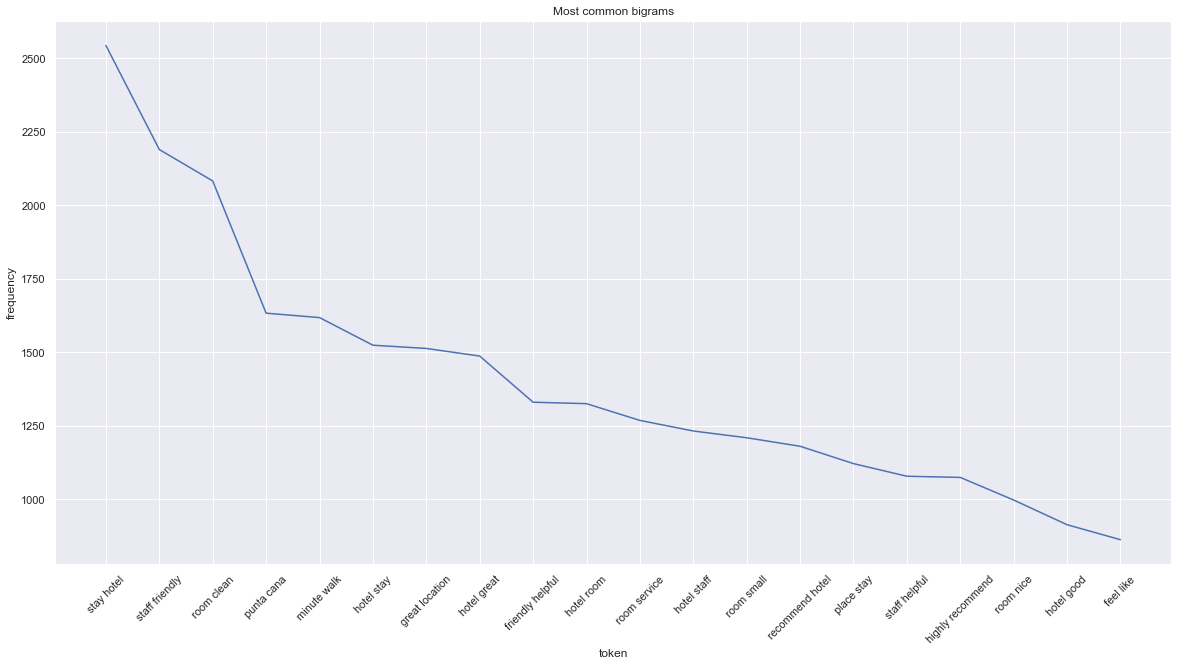

In [6]:
sb.set(rc={"figure.figsize": (20, 10)})
sb.lineplot(data=df_bi, x='token', y='frequency').set(title='Most common bigrams')
plt.xticks(rotation=45);

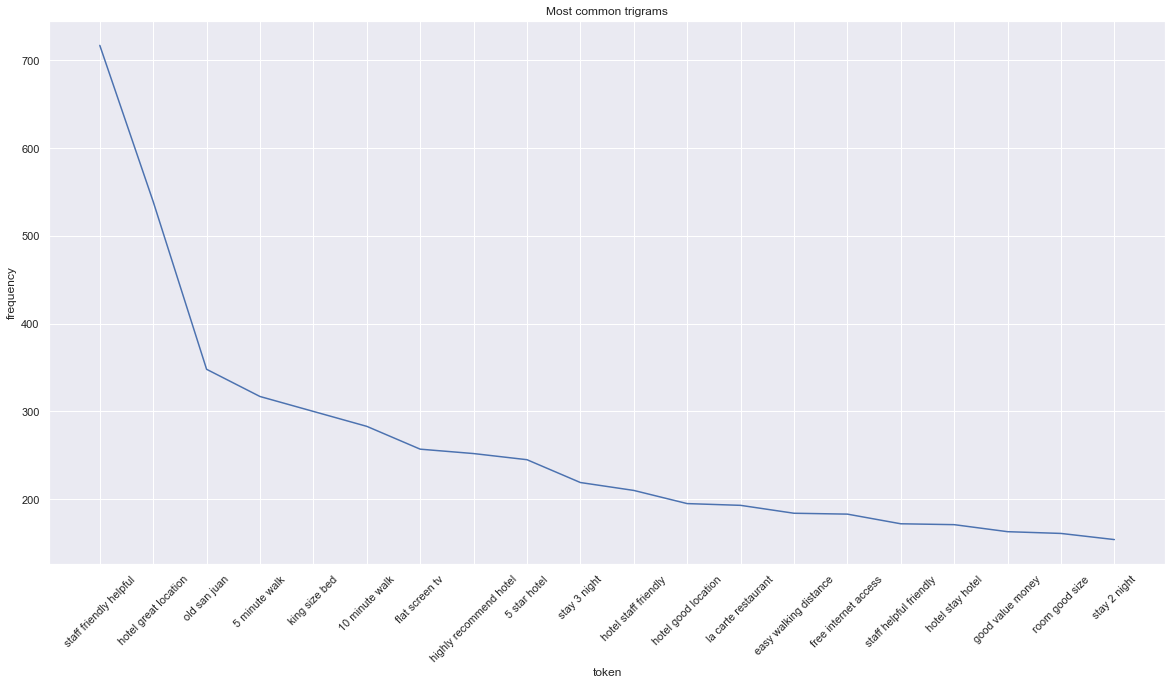

In [7]:
sb.set(rc={"figure.figsize": (20, 10)})
sb.lineplot(data=df_tri, x='token', y='frequency').set(title='Most common trigrams')
plt.xticks(rotation=45);

In [8]:
import plotly.express as px
import cufflinks as cf

# This is to use iplot functions based on pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

fig1 = df['review_length'].iplot(kind='hist', color='aqua', xTitle='Review length', yTitle='Frequency',
                                 title='Review length and Frequency')

In [9]:
fig2 = px.box(df, y="review_length", color="rating", title='Review length with ratings')
fig2.show()

In [10]:
# Create a table of review length associated with different ratings
df.groupby(by=['rating']).describe()

review_length                                                      \
               count        mean         std   min     25%    50%    75%   
rating                                                                     
1             1421.0  663.116819  595.501866  57.0  305.00  490.0  818.0   
2             1793.0  750.239822  646.689251  61.0  374.00  567.0  887.0   
3             2184.0  685.533883  647.258382  35.0  324.75  516.5  810.0   
4             6039.0  660.235304  637.311482  53.0  306.00  482.0  782.0   
5             9054.0  590.567815  552.553875  34.0  286.00  446.0  702.0   

                 
            max  
rating           
1        5598.0  
2        7120.0  
3       11657.0  
4        8706.0  
5       11500.0

We can see the pattern that those who are more satisfied are more likely to give reviews.Also, the data set is not balanced among ratings.

#### Play with Word Cloud

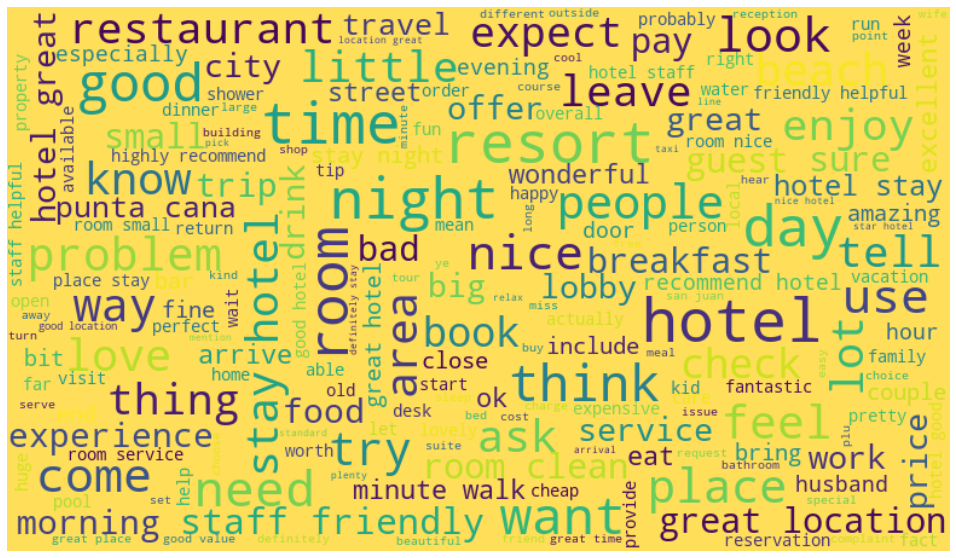

In [11]:
from wordcloud import WordCloud

# Generate a word cloud image of document
wordcloud = WordCloud(width=780, height=450, max_font_size=50,
                      background_color="#ffde59").generate(' '.join(reviews))

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()